In [16]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込めるようにします
from pandas.io.data import DataReader

# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime


ModuleNotFoundError: No module named 'pandas.io.data'

In [13]:
pip install pandas-datareader

    100% |████████████████████████████████| 112kB 1.1MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.yer - 1,end.month,end.day)

for stock in tech_list :
    globals()[stock] = DataReader(stock,'yahoo',start,end)

AttributeError: 'datetime.datetime' object has no attribute 'yer'

In [18]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /private/var/folders/zg/97x21z5s29z37l5gw1kp479w0000gn/T/pip-req-build-ousbbkh1
  Stored in directory: /private/var/folders/zg/97x21z5s29z37l5gw1kp479w0000gn/T/pip-ephem-wheel-cache-49djhqe6/wheels/5f/4c/e3/f9e4e92cb4498744a91d53d37b840fb1959c286bf660740040
Successfully built pandas-datareader
  Found existing installation: pandas-datareader 0.7.0
    Uninstalling pandas-datareader-0.7.0:
      Successfully uninstalled pandas-datareader-0.7.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込めるようにします
from pandas_datareader  import DataReader

# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime



In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list :
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,194.020319,190.103506,192.017729,192.125538,3.250980e+07,190.688572
std,21.726154,21.500910,21.588522,21.593612,1.392638e+07,21.142325
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642
25%,175.934998,173.555000,174.805000,174.794998,2.303000e+07,174.024834
50%,194.479996,190.419998,191.779999,192.229996,2.966390e+07,190.674789
75%,210.089996,206.904999,209.315002,208.875000,3.876575e+07,206.743652
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-07-06 to 2019-07-05
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


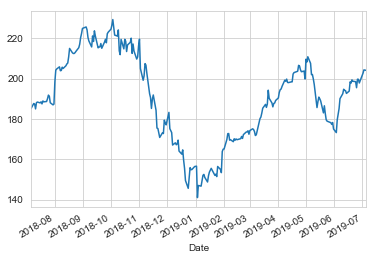

In [55]:
AAPL['Adj Close'].plot()

NameError: name 'pandas' is not defined

In [5]:
#移動平均

ma_day=[10,20,1000]
for ma in ma_day:
    column_name = "MA{}".format(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()
# miss    AAPL[column_name]=pd.Series.rolling(window=3,AAPL['Adj Close'],ma).mean()

In [6]:
MA_10 = AAPL['Adj Close'].rolling(window=ma_day[0]).mean()

In [7]:
MA_20 = AAPL['Adj Close'].rolling(window=ma_day[1]).mean()
MA_50 = AAPL['Adj Close'].rolling(window=ma_day[2]).mean()

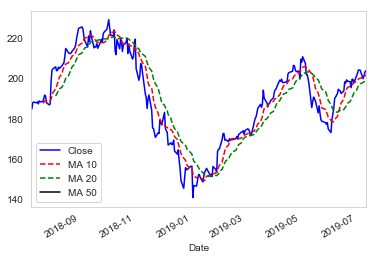

In [10]:
ax= AAPL['Adj Close'].plot(color="blue", label="Close")
MA_10.columns = ["MA 10"]
MA_10.plot(ax = ax, ls="--", color="red", label="MA 10")
MA_20.columns = ["MA 20"]
MA_20.plot(ax=ax, ls="--", color="green", label="MA 20")
MA_50.columns = ["MA 50"]
MA_50.plot(ax=ax, color="black", label="MA 50")
ax.grid()
ax.legend()

<img src='DataSearchResult_20190711231736010.xlsx'>

In [12]:
# Excel形式のファイルを読み込めます。
dframe = pd.read_excel('DataSearchResult_20190711231736010.xlsx', sheetname='シート1 - DataSearchResult_2019071')

In [15]:
dframe.head()

,DataSearchResult_20190711231736010,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,時点,地域コード,地域,年平均気温【℃】,注記,快晴日数（年間）【日】,注記,日照時間（年間）【時間】,注記
1,1975年,19000,山梨県,13.7,NaN,65,NaN,2178.7,NaN
2,1975年,21000,岐阜県,15.2,NaN,64,NaN,2242.9,NaN
3,1975年,22000,静岡県,16.1,NaN,79,NaN,2160.3,NaN
4,1975年,23000,愛知県,14.9,NaN,61,NaN,2261,NaN


In [17]:
df_aapl = DataReader('AAPL','yahoo','2019_3_31')

ValueError: ('Unknown string format:', '2019_3_31')

In [18]:
pip install pandas==0.20.3

    100% |████████████████████████████████| 10.4MB 2.7MB/s ta 0:00:011  30% |██████████                      | 3.2MB 8.1MB/s eta 0:00:01
  Complete output from command /Users/norimatsu/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/zg/97x21z5s29z37l5gw1kp479w0000gn/T/pip-install-85viet_t/pandas/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/zg/97x21z5s29z37l5gw1kp479w0000gn/T/pip-wheel-_0u2lqxw --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.7
  creating build/lib.macosx-10.7-x86_64-3.7/pandas
  copying pandas/conftest.py -> build/lib.macosx-10.7-x86_64-3.7/pandas
  copying pandas/_version.py -> build/lib.macosx-10.7-x86_64-3.7/pandas
  copying pandas/lib.py -> build/lib.macosx-10.7-x86_64-3.7/pandas
  copying pandas/tslib.py -> build/

Failed to build pandas
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Running setup.py install for pandas ... |^C
anceled
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip pandas-datareader==0.5.0

ERROR: unknown command "pandas-datareader==0.5.0"
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pandas

    100% |████████████████████████████████| 15.9MB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
